# **SUBSCRIBE to the [channel](https://www.youtube.com/user/19daredevill?sub_confirmation=1) to learn cool things**

**Step 1 : Clone yolov5 repository**

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 9303, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 9303 (delta 22), reused 41 (delta 21), pack-reused 9260
Receiving objects: 100% (9303/9303), 9.62 MiB | 28.07 MiB/s, done.
Resolving deltas: 100% (6465/6465), done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Step 2: Change Directory to yolov5**

In [1]:
!pwd

/content


In [1]:
%cd yolov5/

/content/yolov5


**Step 3: Install Dependencies**

In [4]:
!pip install -U -r requirements.txt

     |████████████████████████████████| 10.3 MB 5.0 MB/s 
     |████████████████████████████████| 15.7 MB 344 kB/s 
     |████████████████████████████████| 49.9 MB 27 kB/s 
     |████████████████████████████████| 3.0 MB 30.5 MB/s 
     |████████████████████████████████| 636 kB 40.0 MB/s 
     |████████████████████████████████| 28.5 MB 1.5 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 292 kB 66.6 MB/s 
     |████████████████████████████████| 11.3 MB 20.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: panda

**Step 4: Run Object Detection on Images. Provide image path. Upload image in the inference/images/ folder**

In [164]:
!python detect.py --source "/content/yolov5/data/images" --weights "/content/yolov5/yolov5s.pt" --conf 0.4

detect: weights=['/content/yolov5/yolov5s.pt'], source=/content/yolov5/data/images, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-403-gde534e9 torch 1.9.0+cu102 CPU

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.423s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.319s)
Results saved to runs/detect/exp81
Done. (0.965s)


NameError: ignored

**Step 5: Display image in colab**

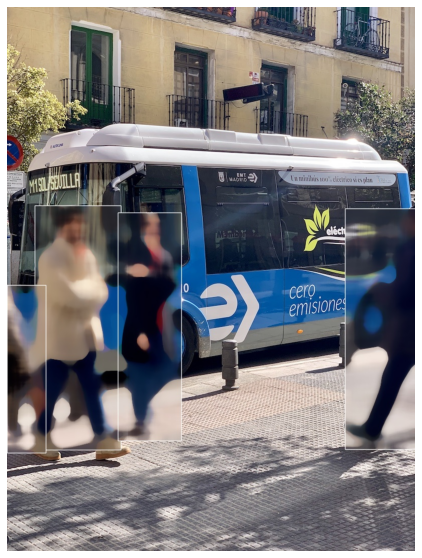

In [165]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("/content/yolov5/runs/detect/exp81/bus.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

**Object Detection on Videos. Create a folder under inference/ called "videos", under which you can upload the video file and then provide the file path below**

In [ ]:
!python detect.py --source "/content/gdrive/MyDrive/Colab Notebooks/kexu.mp4" --weights yolov5s.pt --class 0 1 2 3 --conf 0.4

In [168]:
!cp "/content/yolov5/runs/detect/exp83/kexu.mp4" -r "/content/gdrive/MyDrive"

In [50]:
 stride, names = 64, [f'class{i}' for i in range(1000)] 

In [ ]:
# Reproduce
for x in 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x':
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.25 --iou 0.45  # speed
  !python val.py --weights {x}.pt --data coco.yaml --img 640 --conf 0.001 --iou 0.65  # mAP

In [112]:
# PyTorch Hub
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
dir = 'https://ultralytics.com/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-9-1 torch 1.9.0+cu102 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 
image 1/2: 720x1280 2 persons, 2 ties
image 2/2: 1080x810 4 persons, 1 bus
Speed: 324.9ms pre-process, 496.9ms inference, 2.3ms NMS per image at shape (2, 3, 640, 640)


In [121]:
x = model(imgs)[0]

TypeError: ignored

In [119]:
for i, det in enumerate(results):  # detections per image
    print(i,det)

TypeError: ignored

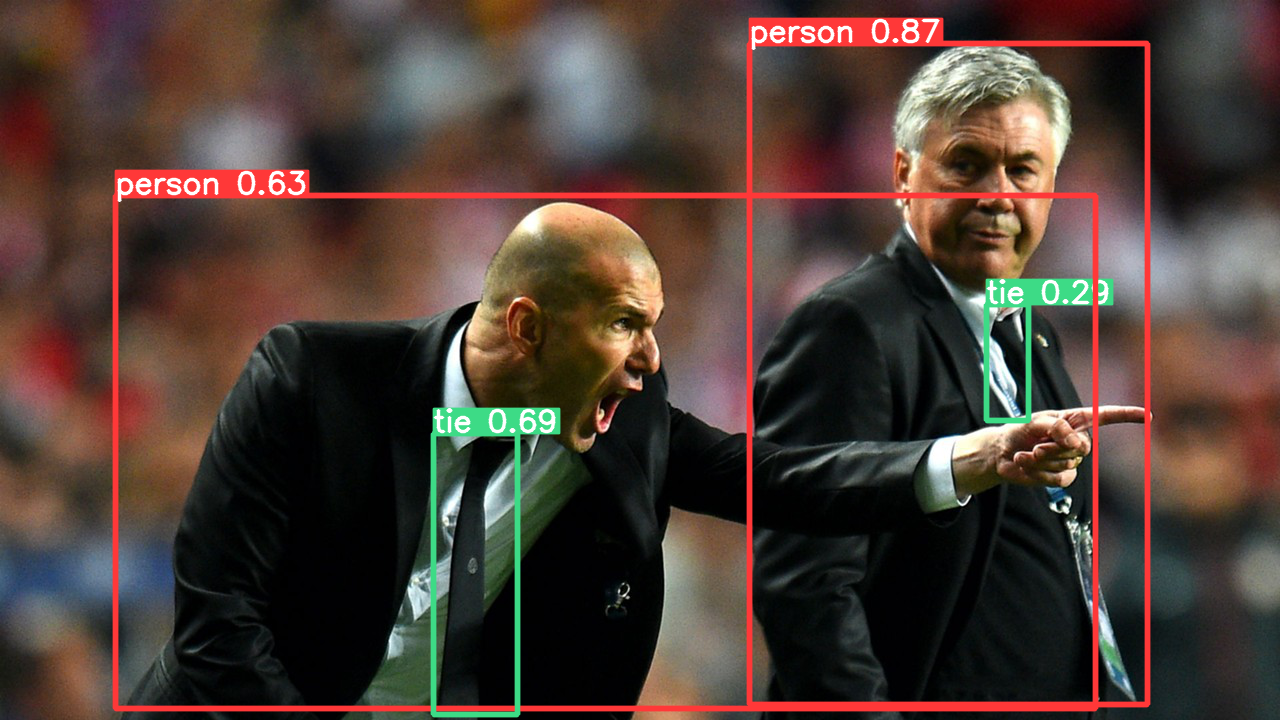

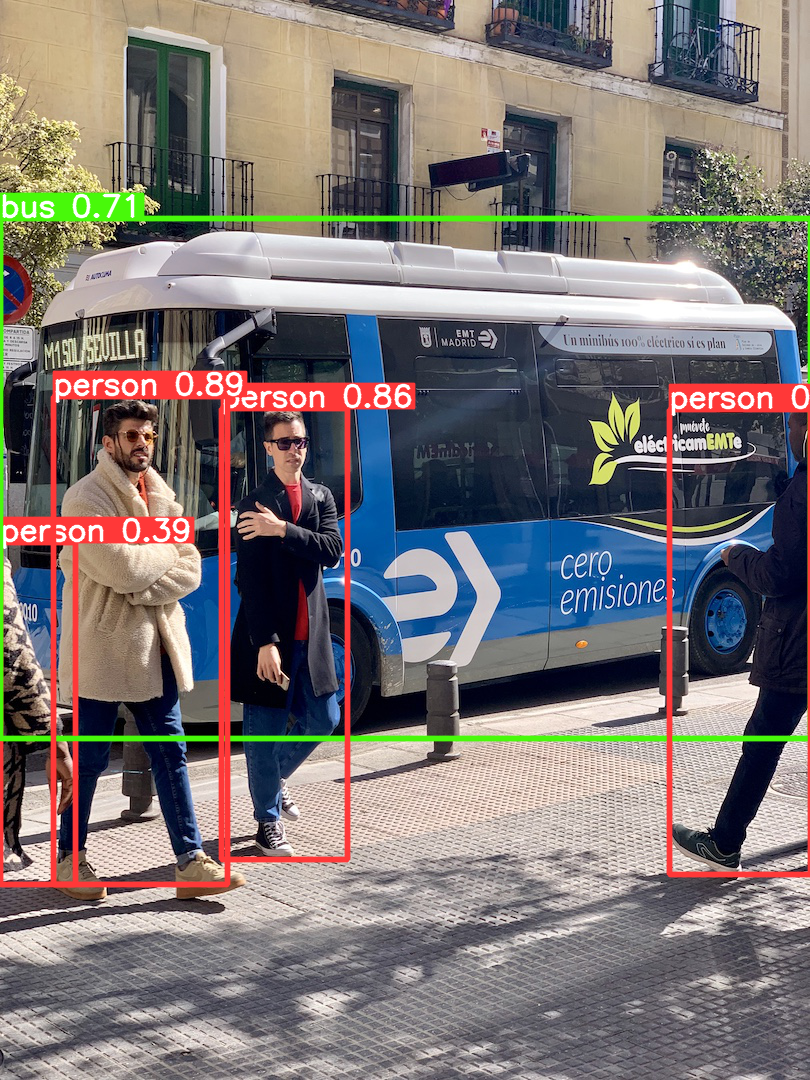

In [115]:
results.show()

In [ ]:
# Unit tests
%%shell
export PYTHONPATH="$PWD"  # to run *.py. files in subdirectories

rm -rf runs  # remove runs/
for m in yolov5s; do  # models
  python train.py --weights $m.pt --epochs 3 --img 320 --device 0  # train pretrained
  python train.py --weights '' --cfg $m.yaml --epochs 3 --img 320 --device 0  # train scratch
  for d in 0 cpu; do  # devices
    python detect.py --weights $m.pt --device $d  # detect official
    python detect.py --weights runs/train/exp/weights/best.pt --device $d  # detect custom
    python val.py --weights $m.pt --device $d # val official
    python val.py --weights runs/train/exp/weights/best.pt --device $d # val custom
  done
  python hubconf.py  # hub
  python models/yolo.py --cfg $m.yaml  # inspect
  python export.py --weights $m.pt --img 640 --batch 1  # export
done